In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [8]:
# Create an instance of the Faker class
fake = Faker()

# Initialize empty lists for data
years = []
sales = []
prices = []

# Generate synthetic data for 1000 rows
for _ in range(1000):
    years.append(random.choice(range(2017, 2023)))  # Random year between 2017 and 2022
    sales.append(random.randint(1000, 50000))  # Random sales between 1000 and 50000 units
    prices.append(round(random.uniform(100, 1000), 2))  # Random price between $100 and $1000

# Create a DataFrame
data = pd.DataFrame({'Year': years, 'Sales': sales, 'Price': prices})

# Save the DataFrame to a CSV file
data.to_csv('smartphone_market_data.csv', index=False)

print("Dataset saved as smartphone_market_data.csv")

Dataset saved as smartphone_market_data.csv


In [9]:
data.head()

,Year,Sales,Price
0,2018,48890,284.27
1,2018,21475,683.64
2,2018,24416,705.17
3,2018,30135,915.98
4,2022,11509,105.01


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1000 non-null   int64  
 1   Sales   1000 non-null   int64  
 2   Price   1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [11]:
# Calculate market share
market_share = data.groupby("Year")["Sales"].sum() / data["Sales"].sum() * 100

# Calculate average price
average_price = data.groupby("Year")["Price"].mean()

# Calculate year-over-year growth rate
growth_rate = market_share.pct_change() * 100

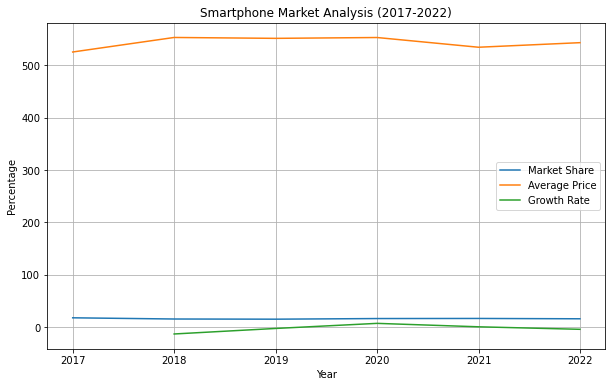

In [14]:
# Plotting market share, average price, and growth rate
plt.figure(figsize=(10, 6))
plt.plot(market_share, label="Market Share")
plt.plot(average_price, label="Average Price")
plt.plot(growth_rate, label="Growth Rate")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Smartphone Market Analysis (2017-2022)")
plt.legend()
plt.grid(True)
plt.show()

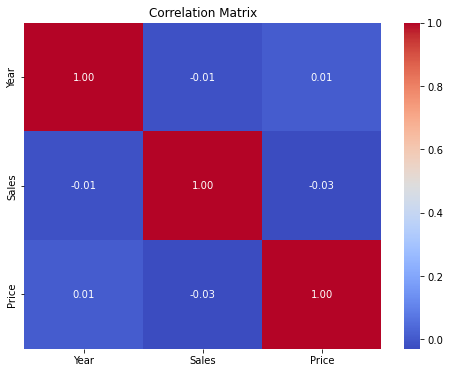

In [15]:
# Correlation matrix and heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

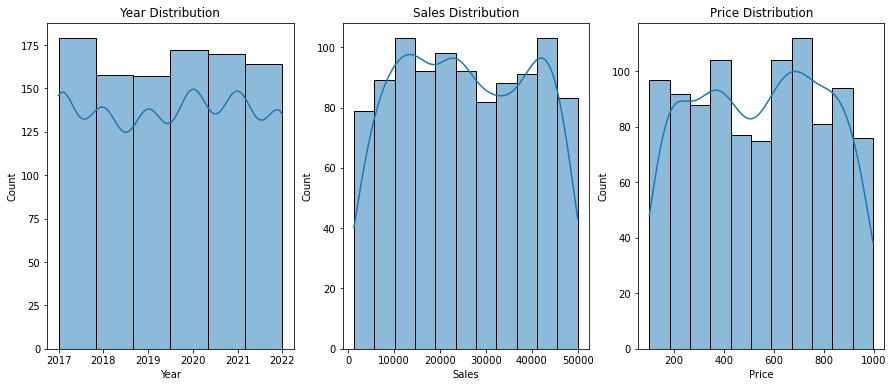

In [16]:
# Distribution plots
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Year'], kde=True, bins=6)
plt.title('Year Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

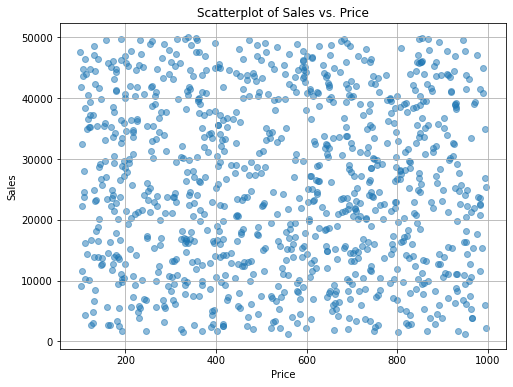

In [17]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data['Price'], data['Sales'], alpha=0.5)
plt.title('Scatterplot of Sales vs. Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

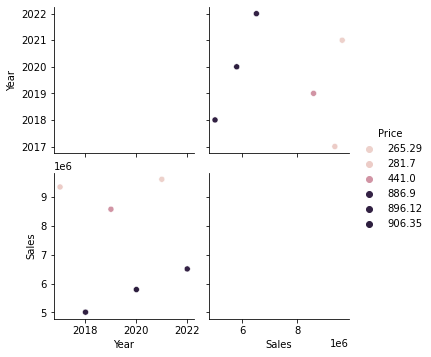

In [19]:
sns.pairplot(df, hue='Price')